# AN EXPLORATORY DATA ANALYSIS IN MOVIES
Scripting Language Project by Ching-Han Kuo (r0911555)

In this project, three datasets are analysed. First, it looks at the scope of a dataset containing the top 1000 ranking movies on IMDB. Second, it compares the top 1000 movies with Christmas movies. Finally, it investigates the scripts of the Star Wars trilogy.

In [1]:
!unzip movie_data.zip

'unzip' 不是內部或外部命令、可執行的程式或批次檔。


## 1. IMDB Top 1000

Now, we take a glance at the first dataset, which stores the top 1000 ranking movies on IMDB.

In [2]:
import pandas as pd

In [3]:
df_top1000 = pd.read_csv('movie_data\imdb_top_1000.csv')

# make columns more neat and readable
columns = df_top1000.columns
for column in columns:
    column_clean = column.strip().title()
    df_top1000.rename(columns = {column:column_clean}, inplace = True)

# call the top five rows of the CSV
df_top1000.head()

,Ranking Of Movie,Movie Name,Year,Certificate,Runtime,Genre,Rating,Metascore,Detail About Movie,Director,Actor 1,Actor 2,Actor 3,Actor 4,Votes,Gross Collection
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


### 1-1. Descriptive Statistics

#### • Released Year

In which year were these movies released? We find it by looking at the column 'Year'

In [4]:
df_top1000['Year'].head()

0    -1994
1    -1972
2    -2008
3    -2003
4    -1993
Name: Year, dtype: object

Noticeably, the cells in this column contain '-' which should be eliminated, and the whole column should also be transformed into an integer type to be computed further.

In [5]:
# replace all the character in the column that is not a number
# then transform the column into a numeric type
df_top1000['Year'] = df_top1000['Year'].str.replace("[^0-9]", "", regex = True).apply(pd.to_numeric)

Now we can play with the column. First, it can be sorted by year. We can see that the oldest movie in the top 1000 is 'The Cabinet of Dr. Caligari' which is released in 1920.

In [6]:
# sort from the smallest number of 'Year'
df_top1000.loc[:, ['Movie Name','Year']].sort_values(by = ['Year']).head()

,Movie Name,Year
460,The Cabinet of Dr. Caligari,1920
134,The Kid,1921
588,Nosferatu,1922
204,Sherlock Jr.,1924
459,Battleship Potemkin,1925


We can also set a condition to see what movies in the top 1000 were released in 2022, and there are five movies.

In [7]:
df_top1000.loc[df_top1000['Year'] == 2022]['Movie Name']

20                     Top Gun: Maverick
38                      K.G.F: Chapter 2
92     Everything Everywhere All at Once
206                                  RRR
480                           The Batman
Name: Movie Name, dtype: object

After computing the result of the distribution of the released year, it seems that most of the top 1000 movies (almost 50%) were released after 2000.

(count    1000.000000
 mean     1991.176000
 std        23.875449
 min      1920.000000
 25%      1975.000000
 50%      1999.000000
 75%      2010.000000
 max      2022.000000
 Name: Year, dtype: float64,
 <AxesSubplot:>)

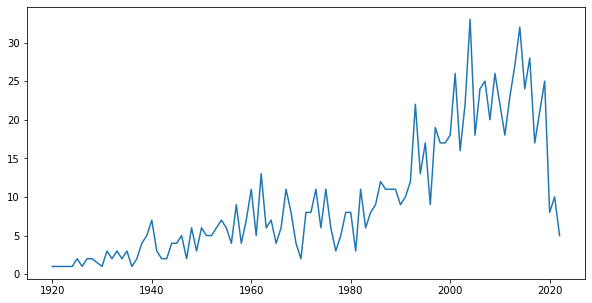

In [8]:
# get a description of this column, and plot a line graph
df_top1000['Year'].describe(), df_top1000['Year'].value_counts().sort_index().plot.line(figsize = (10, 5))

But in which period released the most movies in the top 1000? To get this information, we need to make another column 'Period', and tag each year with the period accordingly.

In [9]:
# create a list of the period
# and each period is appended according to each row in the column 'Year'
period_list = []
for row in df_top1000['Year']:
    if row >= 2020:
        period_list.append('2020s')
    elif row >= 2010:
        period_list.append('2010s')
    elif row >= 2000:
        period_list.append('2000s')
    elif row >= 1990:
        period_list.append('1990s')
    elif row >= 1980:
        period_list.append('1980s')
    elif row >= 1970:
        period_list.append('1970s')
    elif row >= 1960:
        period_list.append('1960s')
    elif row >= 1950:
        period_list.append('1950s')
    elif row >= 1940:
        period_list.append('1940s')
    elif row >= 1930:
        period_list.append('1930s')
    else:
        period_list.append('1920s')

# create a column 'Period' to store the period_list
df_top1000['Period'] = period_list

df_top1000.loc[:, ['Year', 'Period']].head()

,Year,Period
0,1994,1990s
1,1972,1970s
2,2008,2000s
3,2003,2000s
4,1993,1990s


Now we have the period column to play with! We can see that most of the movies in the top 1000 were released in the 2010s (23.7%).

In [10]:
# compute the counts and percentages of column 'Period'
period_counts = df_top1000['Period'].value_counts()
period_percentages = df_top1000['Period'].value_counts(normalize = True).mul(100).round(2)

# then build a table to contain this information
pd.concat([period_counts, period_percentages], axis = 1, keys = ['Count', 'Percentage'])

,Count,Percentage
2010s,237,23.7
2000s,228,22.8
1990s,145,14.5
1980s,90,9.0
1960s,75,7.5
1970s,68,6.8
1950s,59,5.9
1940s,38,3.8
1930s,26,2.6
2020s,23,2.3


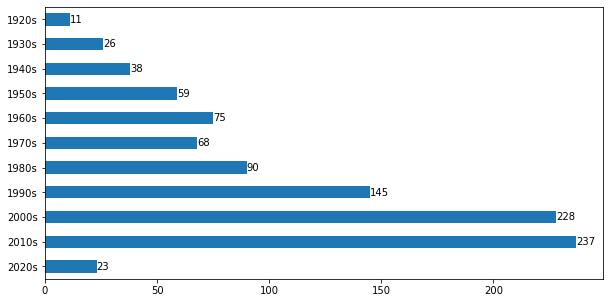

In [11]:
# plot the bar chart and sort the index in chronological order
period_plot = df_top1000['Period'].value_counts().sort_index(ascending = False).plot.barh(figsize = (10, 5))

# to insert value labels in the graph
for container in period_plot.containers:
    period_plot.bar_label(container)

#### • Runtime

By looking at the column 'Runtime', we can find out how long the top 1000 movies are.

In [12]:
df_top1000['Runtime'].head()

0    142 min
1    175 min
2    152 min
3    201 min
4    195 min
Name: Runtime, dtype: object

As in column 'Year', characters in column 'Runtime' that are not numbers are needed to be eliminated too.

In [13]:
df_top1000['Runtime'] = df_top1000['Runtime'].str.replace("[^0-9]", "", regex = True).apply(pd.to_numeric)

By sorting, we can see that the shortest movie in the top 1000 is 'Sherlock Jr.' (45 mins), and the longest one is 'Gangs of Wasseypur' (321 mins).

In [14]:
# sort from the smallest number of 'Runtime'
df_top1000.loc[:, ['Movie Name', 'Runtime']].sort_values(by = ['Runtime']).head()

,Movie Name,Runtime
204,Sherlock Jr.,45
460,The Cabinet of Dr. Caligari,58
587,Freaks,64
202,The General,67
134,The Kid,68


In [15]:
# sort from the largest number of 'Runtime'
df_top1000.loc[:, ['Movie Name',
                   'Runtime']].sort_values(by = ['Runtime'], ascending = False).head()

,Movie Name,Runtime
147,Gangs of Wasseypur,321
355,Zack Snyder's Justice League,242
672,Hamlet,242
200,Gone with the Wind,238
114,Once Upon a Time in America,229


And compute the distribution, we can realise that in the top 1000 movies, more than half of them are 100 to 150 minutes.

In [16]:
# seaborn can plot the box plot more nicely, so we import it here
import seaborn as sns

(count    1000.000000
 mean      123.637000
 std        28.559602
 min        45.000000
 25%       103.000000
 50%       120.000000
 75%       138.000000
 max       321.000000
 Name: Runtime, dtype: float64,
 <AxesSubplot:xlabel='Runtime'>)

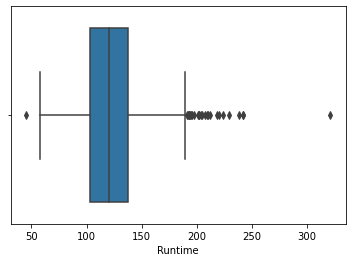

In [17]:
# get a description of this column, and plot a box plot
df_top1000['Runtime'].describe(), sns.boxplot(x = 'Runtime', data = df_top1000)

#### • Rating

Column 'Rating' is already in float type, so we can analyse it directly.

In [18]:
df_top1000['Rating'].head()

0    9.3
1    9.2
2    9.0
3    9.0
4    9.0
Name: Rating, dtype: float64

And, because the ranking is according to the rating, so we can just search the highest and lowest rating of the movie by sorting 'Ranking Of Movie'. In the top 1000 movies, the movie with the highest rating is 'The Shawshank Redemption' (9.3), and 'The Invisible Man' has the lowest rating (7.6).

In [19]:
df_top1000.loc[:, ['Ranking Of Movie', 'Movie Name', 'Rating']].head()

,Ranking Of Movie,Movie Name,Rating
0,1,The Shawshank Redemption,9.3
1,2,The Godfather,9.2
2,3,The Dark Knight,9.0
3,4,The Lord of the Rings: The Return of the King,9.0
4,5,Schindler's List,9.0


In [20]:
df_top1000.loc[:, ['Ranking Of Movie',
                   'Movie Name',
                   'Rating']].sort_values(by = ['Ranking Of Movie'], ascending = False).head()

,Ranking Of Movie,Movie Name,Rating
999,1000,The Invisible Man,7.6
998,999,The 39 Steps,7.6
997,998,Snow White and the Seven Dwarfs,7.6
996,997,From Here to Eternity,7.6
995,996,Sabrina,7.6


We can also see that most of the top 1000 movies are rated under 8 (around 75%), indicating that you should be celebrating if you made a movie that is rated higher than 8 on IMDB.

(count    1000.000000
 mean        7.960200
 std         0.276717
 min         7.600000
 25%         7.700000
 50%         7.900000
 75%         8.100000
 max         9.300000
 Name: Rating, dtype: float64,
 <AxesSubplot:xlabel='Rating'>)

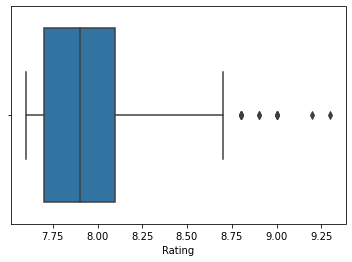

In [21]:
df_top1000['Rating'].describe(), sns.boxplot(x = 'Rating', data = df_top1000)

#### • Gross

In column 'Gross Collection', it is obvious that we need to organise it by eliminating the non-numeric characters.

In [22]:
df_top1000['Gross Collection'].head()

0     $28.34M
1    $134.97M
2    $534.86M
3    $377.85M
4     $96.90M
Name: Gross Collection, dtype: object

In [23]:
df_top1000['Gross Collection'] = df_top1000['Gross Collection'].str.replace("\$|M", "", regex = True).apply(pd.to_numeric)

The currency of gross is in the US dollar. However, we can not compute the number of it directly because it does not take inflation into account. We have another file which indicates the Consumer Price Index (CPI) in the US each year, and we can use it to calculate gross which can reflect the inflation.

In [24]:
df_cpi = pd.read_csv('movie_data\CPI_US.csv')
df_cpi.tail()

,Year,CPI
98,2018,251.11
99,2019,255.66
100,2020,258.81
101,2021,270.97
102,2022,292.28


We need to compute the gross of each year to the number that can reflect the price in 2022. We can insert another column that stores the gross number after the desired calculation.

In [25]:
# merge the movie data frame with the CPI data
# and we need to sort the table again because the order changes after merging
df_top1000 = pd.merge(df_top1000, df_cpi).sort_values(by = ['Ranking Of Movie']).reset_index(drop = True)

# create a new column 'Gross After CPI' which inserted the calculated numbers
df_top1000['Gross After CPI'] = (df_top1000['Gross Collection'] * 292.28 / df_top1000['CPI']).round(2)

Now we can find out that using the gross reflected the inflation, 'Gone with the Wind' made way more money than other movies in the top 1000 movies.

In [26]:
# sort from the largest number of 'Gross After CPI'
df_top1000.loc[:, ['Movie Name',
                   'Gross Collection',
                   'Gross After CPI']].sort_values(by = ['Gross After CPI'], ascending = False).head()

,Movie Name,Gross Collection,Gross After CPI
200,Gone with the Wind,198.68,4174.71
997,Snow White and the Seven Dwarfs,184.93,3758.79
904,Fantasia,76.41,1594.08
30,Star Wars,322.74,1556.35
298,The Exorcist,232.91,1533.22


And the distribution shows that of the top 1000 movies, half of them made less than 60M USD (reflected in the inflation), and it may be rare for a movie to make more than 200M USD.

(count     820.000000
 mean      157.608890
 std       296.395793
 min         0.000000
 25%         7.065000
 50%        58.065000
 75%       193.250000
 max      4174.710000
 Name: Gross After CPI, dtype: float64,
 <AxesSubplot:xlabel='Gross After CPI'>)

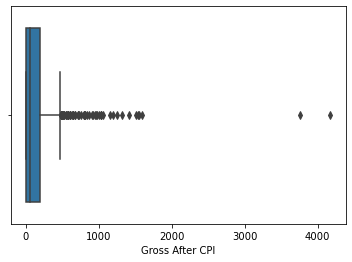

In [27]:
df_top1000['Gross After CPI'].describe(), sns.boxplot(x = 'Gross After CPI', data = df_top1000)

#### • Genres

Column 'Genres' is a little bit tricky, as you can see, there can be several genres in one cell.

In [28]:
df_top1000['Genre'].head()

0                        Drama
1                 Crime, Drama
2         Action, Crime, Drama
3     Action, Adventure, Drama
4    Biography, Drama, History
Name: Genre, dtype: object

Therefore, first, it is needed to be separated by ','.

In [29]:
genres_raw = df_top1000['Genre'].str.split(", ", expand = True).reset_index(drop = True)
genres_raw.head()

,0,1,2
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Action,Adventure,Drama
4,Biography,Drama,History


Then, we can concatenate the separated columns into one column. As you can see, there are 3000 rows.

In [30]:
genres = pd.DataFrame()
genres['Genre'] = pd.concat([genres_raw[0], genres_raw[1], genres_raw[2]], ignore_index=True)
genres

,Genre
0,Drama
1,Crime
2,Action
3,Action
4,Biography
...,...
2995,Romance
2996,War
2997,Family
2998,Thriller


Now, because we will need to see the rating and gross for each genre, we need to extract the corresponding number for each separated genre. First, we extract the rating for each genre.

In [31]:
# we need to use np.nan later, so numpy is imported here
import numpy as np

In [32]:
genres_rating_raw = pd.DataFrame()

# because the genre is separated into three columns in table 'genres_raw'
# here we will iteratively add i till two
i = 0
while i < 3:
    # the corresponding numbers will be put into this list first
    rating_list = []
    # we will need to specify the row to extract number
    # so we set row = 0 here and will iteratively add it later
    row = 0
    for genre in genres_raw[i]:
        # if there is a genre in the cell
        # it will insert the corresponding number in column 'Rating'
        if genre:
            rating_list.append(df_top1000['Rating'][row])
        # otherwise it will insert NaN
        else:
            rating_list.append(np.nan)
        # now we can extract the number in the next row
        row += 1
    # insert the list with the corresponding numbers to the empty table 'genres_rating_raw'
    genres_rating_raw.insert(i, i, rating_list)
    # now we can do the matching in the next column in table 'genres_raw'
    i += 1

genres_rating_raw.head()

,0,1,2
0,9.3,NaN,NaN
1,9.2,9.2,NaN
2,9.0,9.0,9.0
3,9.0,9.0,9.0
4,9.0,9.0,9.0


Then we do the same for gross.

In [33]:
genres_gross_raw = pd.DataFrame()

i = 0
while i < 3:
    gross_list = []
    row = 0
    for genre in genres_raw[i]:
        if genre:
            gross_list.append(df_top1000['Gross After CPI'][row])
        else:
            gross_list.append(np.nan)
        row += 1
    genres_gross_raw.insert(i, i, gross_list)
    i += 1

genres_gross_raw.head()

,0,1,2
0,55.88,NaN,NaN
1,943.31,943.31,NaN
2,726.10,726.10,726.10
3,600.34,600.34,600.34
4,196.05,196.05,196.05


Now we just have to combine the corresponding number with the genres column we created before.

In [34]:
# insert the column which concatenated the separated columns of 'genres_rating_raw'
genres['Rating'] = pd.concat([genres_rating_raw[0],
                              genres_rating_raw[1],
                              genres_rating_raw[2]], ignore_index=True)

# insert the column which concatenated the separated columns of 'genres_gross_raw'
genres['Gross After CPI'] = pd.concat([genres_gross_raw[0],
                                       genres_gross_raw[1],
                                       genres_gross_raw[2]], ignore_index=True)

genres.head()

,Genre,Rating,Gross After CPI
0,Drama,9.3,55.88
1,Crime,9.2,943.31
2,Action,9.0,726.10
3,Action,9.0,600.34
4,Biography,9.0,196.05


Voilà! we have our table to manipulate. First, we can compute counts and averages grouped by genres.

In [35]:
# computed the desired numbers which are grouped by genres
genres_counts = genres['Genre'].value_counts()
genres_rating = genres.groupby('Genre')['Rating'].mean().round(2)
genres_gross = genres.groupby('Genre')['Gross After CPI'].mean().round(2)

# create a table to store the computed numbers
df_genre = pd.concat([genres_counts,
                      genres_rating,
                      genres_gross], axis = 1, keys = ['Count', 'Rating', 'Gross'])

df_genre.head()

,Count,Rating,Gross
Drama,730,7.97,112.86
Comedy,237,7.91,142.29
Crime,207,7.98,94.90
Action,200,7.97,241.57
Adventure,190,7.97,339.83


There are 21 distinct genres in the dataset. By sorting, we can find out that most movies are in the genre of drama, war movies have a better average rating, and family movies earned the most money on average.

In [36]:
# number of distinct genres
len(df_genre.index)

21

In [37]:
# sort by count
df_genre['Count'].sort_values(ascending = False).head()

Drama        730
Comedy       237
Crime        207
Action       200
Adventure    190
Name: Count, dtype: int64

In [38]:
# sort by rating
df_genre['Rating'].sort_values(ascending = False).head()

War          8.05
Western      8.03
Film-Noir    7.99
Mystery      7.99
Crime        7.98
Name: Rating, dtype: float64

In [39]:
# sort by gross
df_genre['Gross'].sort_values(ascending = False).head()

Family       387.53
Adventure    339.83
Animation    283.77
Fantasy      275.62
War          274.02
Name: Gross, dtype: float64

#### • Directors

Every cell of the column 'Director' only contains one item, so we can compute what we want straightforwardly.

In [40]:
df_top1000['Director'].head()

0          Frank Darabont
1    Francis Ford Coppola
2       Christopher Nolan
3           Peter Jackson
4        Steven Spielberg
Name: Director, dtype: object

In [41]:
# compute counts and averages and create a table to show the result
director_counts = df_top1000['Director'].value_counts()
director_rating = df_top1000.groupby('Director')['Rating'].mean().round(2)
director_gross = df_top1000.groupby('Director')['Gross After CPI'].mean().round(2)
df_director = pd.concat([director_counts,
                         director_rating,
                         director_gross], axis = 1, keys = ['Count', 'Rating', 'Gross'])
df_director.head()

,Count,Rating,Gross
Alfred Hitchcock,13,8.03,147.14
Steven Spielberg,13,8.06,532.61
Akira Kurosawa,12,8.16,4.09
Hayao Miyazaki,10,8.01,8.49
Martin Scorsese,10,8.14,96.88


There are 554 distinct directors in the dataset. Alfred Hitchcock has the most movie in the top 1000, Frank Darabont has the highest average rating, and William Cottrell's movies earned the most on average.

In [42]:
# number of distinct directors
len(df_director.index)

554

In [43]:
# sort by count
df_director['Count'].sort_values(ascending = False).head()

Alfred Hitchcock    13
Steven Spielberg    13
Akira Kurosawa      12
Hayao Miyazaki      10
Martin Scorsese     10
Name: Count, dtype: int64

In [44]:
# sort by rating
df_director['Rating'].sort_values(ascending = False).head()

Frank Darabont    8.95
T.J. Gnanavel     8.90
Lana Wachowski    8.70
Sudha Kongara     8.70
Irvin Kershner    8.70
Name: Rating, dtype: float64

In [45]:
# sort by gross
df_director['Gross'].sort_values(ascending = False).head()

William Cottrell       3758.79
Victor Fleming         2109.21
James Algar            1594.08
Robert Wise            1513.90
Wolfgang Reitherman    1242.72
Name: Gross, dtype: float64

#### • Actors

The way this dataset shows the actors in each movie is also tricky, it is separated into four columns.

In [46]:
actors_raw = df_top1000.loc[:, ['Actor 1', 'Actor 2', 'Actor 3', 'Actor 4']]
actors_raw.head()

,Actor 1,Actor 2,Actor 3,Actor 4
0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
4,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall


So we have to do the same thing as what we have done for genres, which is making a long column of actors and extracting the corresponding number for each actor.

In [47]:
actors = pd.DataFrame()

# make the long column for actors
actors['Actor'] = pd.concat([actors_raw['Actor 1'],
                             actors_raw['Actor 2'],
                             actors_raw['Actor 3'],
                             actors_raw['Actor 4']], ignore_index=True)

# extract rating that each actor has (which is connected to the movie he/she was in)
# the way to extract it is the same as we did in the genre section
actors_rating_raw = pd.DataFrame()
i = 1
while i < 5:
    rating_list = []
    row = 0
    for genre in actors_raw['Actor ' + str(i)]:
        if genre:
            rating_list.append(df_top1000['Rating'][row])
        else:
            rating_list.append(np.nan)
        row += 1
    actors_rating_raw.insert(i - 1, i - 1, rating_list)
    i += 1

# extract gross that each actor has (which is connected to the movie he/she was in)
# the way to extract it is the same as we did in the genre section
actors_gross_raw = pd.DataFrame()
i = 1
while i < 5:
    gross_list = []
    row = 0
    for genre in actors_raw['Actor ' + str(i)]:
        if genre:
            gross_list.append(df_top1000['Gross After CPI'][row])
        else:
            gross_list.append(np.nan)
        row += 1
    actors_gross_raw.insert(i - 1, i - 1, gross_list)
    i += 1

# insert the column which concatenated the separated columns
actors['Rating'] = pd.concat([actors_rating_raw[0],
                              actors_rating_raw[1],
                              actors_rating_raw[2],
                              actors_rating_raw[3]], ignore_index=True)
actors['Gross After CPI'] = pd.concat([actors_gross_raw[0],
                                       actors_gross_raw[1],
                                       actors_gross_raw[2],
                                       actors_gross_raw[3]], ignore_index=True)

actors.head()

,Actor,Rating,Gross After CPI
0,Tim Robbins,9.3,55.88
1,Marlon Brando,9.2,943.31
2,Christian Bale,9.0,726.10
3,Elijah Wood,9.0,600.34
4,Liam Neeson,9.0,196.05


Now we can compute numbers grouped by actors.

In [48]:
# compute numbers and create a table to store them
actors_counts = actors['Actor'].value_counts()
actors_rating = actors.groupby('Actor')['Rating'].mean().round(2)
actors_gross = actors.groupby('Actor')['Gross After CPI'].mean().round(2)
df_actor = pd.concat([actors_counts,
                      actors_rating,
                      actors_gross], axis = 1, keys = ['Count', 'Rating', 'Gross'])
df_actor.head()

,Count,Rating,Gross
Robert De Niro,16,8.13,128.72
Tom Hanks,14,8.04,334.17
Al Pacino,13,8.08,194.49
Brad Pitt,11,8.05,134.28
Leonardo DiCaprio,11,8.13,278.97


There are 2710 distinct actors/actresses in this dataset. Robert De Niro participated in the most movies in the top 1000, Bob Gunton's movies have the highest average rating, and Sam Wood's movies have earned the most on average.

In [49]:
# distinct number of actors
len(df_actor.index)

2710

In [50]:
# sort by count
df_actor['Count'].sort_values(ascending = False).head()

Robert De Niro       16
Tom Hanks            14
Al Pacino            13
Brad Pitt            11
Leonardo DiCaprio    11
Name: Count, dtype: int64

In [51]:
# sort by rating
df_actor['Rating'].sort_values(ascending = False).head()

Bob Gunton          9.3
William Sadler      9.3
Aaron Eckhart       9.0
Caroline Goodall    9.0
John Travolta       8.9
Name: Rating, dtype: float64

In [52]:
# sort by gross
df_actor['Gross'].sort_values(ascending = False).head()

Sam Wood           4174.71
Perce Pearce       3758.79
Wilfred Jackson    3758.79
Larry Morey        3758.79
David Hand         2676.44
Name: Gross, dtype: float64

### 1-2. Cross-Tabulation Analysis

Does the genre of movies change over time? To answer this, we can perform a cross-tabulation analysis between two categorical factors: Genre and Period.

#### • Genre X Period

As mentioned before, the genre column is adjusted so we can properly analyse it. To see the relationship between period and genre, we also need to match the corresponding period for each genre first.

In [53]:
# the extracting method is the same as in the genre section in the previous
genres_period = pd.DataFrame()
genres_period['Genre'] = genres.loc[:, 'Genre']
genres_period_raw = pd.DataFrame()

i = 0
while i < 3:
    period_list = []
    row = 0
    for genre in genres_raw[i]:
        if genre:
            period_list.append(df_top1000['Period'][row])
        else:
            period_list.append(np.nan)
        row += 1
    genres_period_raw.insert(i, i, period_list)
    i += 1

genres_period['Period'] = pd.concat([genres_period_raw[0], genres_period_raw[1], genres_period_raw[2]], ignore_index=True)

genres_period.head()

,Genre,Period
0,Drama,1990s
1,Crime,1970s
2,Action,2000s
3,Action,2000s
4,Biography,1990s


Now we have the period for each genre, we can create the cross table.

In [54]:
pd.crosstab(genres_period['Genre'],
            genres_period['Period'],
            margins = True).sort_values(by = ['All'], ascending = False)

Period,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2020s,All
Genre,,,,,,,,,,,,
All,30,66,103,136,180,160,220,357,599,624,63,2538
Drama,6,13,28,50,55,45,54,111,179,173,16,730
Comedy,5,10,10,7,10,15,27,36,47,64,6,237
Crime,0,3,11,14,9,15,13,40,53,44,5,207
Action,2,2,2,3,11,8,19,22,53,68,10,200
Adventure,2,5,3,8,12,10,23,16,44,59,8,190
Thriller,2,3,4,8,14,11,6,21,33,27,2,131
Romance,3,6,10,10,9,5,4,22,29,28,1,127
Biography,1,0,0,0,10,8,9,14,25,37,3,107


After doing a chi-squared test on the cross table, the result shows that the p-value < 0.05, indicating that there is a significant difference in genres in each period.

In [55]:
# scipy is imported for computing the p-value
# you may need to install it first in order to execute it
# !pip install scipy
from scipy import stats

In [56]:
# compute the p-value
c, p, dof, expected = stats.chi2_contingency(pd.crosstab(genres_period['Genre'],
                                                         genres_period['Period']))
p

1.1222885521953558e-41

We can see that for example, there were fewer comedies and more dramas in the 1950s than in any other period, which may be a demonstration of the effect of the beginning of the cold war.

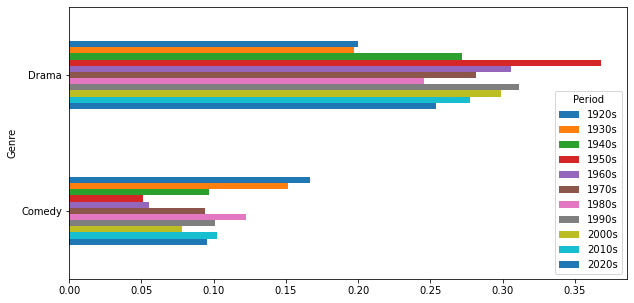

In [57]:
# it would be more appropriate to compare the proportion
# so we normalise the cross table here
genre_x_period = pd.crosstab(genres_period['Genre'],
                             genres_period['Period'],
                             normalize = 'columns',
                             margins = True).sort_values(by = ['All'], ascending = False)

# plot the bar chart with the two genres having the most counts
genre_x_period_plt = genre_x_period.loc[:, '1920s':'2020s'].head(2)
genre_x_period_plt
genre_x_period_plt.plot.barh(figsize = (10, 5)).invert_yaxis()

### 1-3. Linear Regression

What are the relationships between the numeric factors: Year, Runtime, Rating and Gross? For example, is it true that the later the movie, the higher the rating? We can conduct linear regression to answer this.

In [58]:
# extract the columns that are our desired analysing factors into one table
df_numeric = df_top1000.loc[:, ['Year', 'Runtime', 'Rating', 'Gross After CPI', ]]
df_numeric.head()

,Year,Runtime,Rating,Gross After CPI
0,1994,142,9.3,55.88
1,1972,175,9.2,943.31
2,2008,152,9.0,726.10
3,2003,201,9.0,600.34
4,1993,195,9.0,196.05


The package 'Pingouin' can not only quickly compute the correlation of several numeric factors, but also indicate if there is a statistical significance with a star mark.

In [59]:
# you may need to install pingouin first to execute it
# !pip install pingouin
import pingouin as pg

In [60]:
df_numeric.rcorr()

,Year,Runtime,Rating,Gross After CPI
Year,-,***,**,***
Runtime,0.196,-,***,***
Rating,-0.092,0.259,-,**
Gross After CPI,-0.15,0.167,0.112,-


From the result, although there is a statistical significance in every relationship of each factor (they all have star marks), the correlations are all weak (< 0.3). The Runtime and Rating relationship shows the strongest positive correlation of 0.259, which suggests that it may be slightly helpful to get a better rate if the movie is longer.

(0.2587135054860926, <seaborn.axisgrid.FacetGrid at 0x1b74b01ba60>)

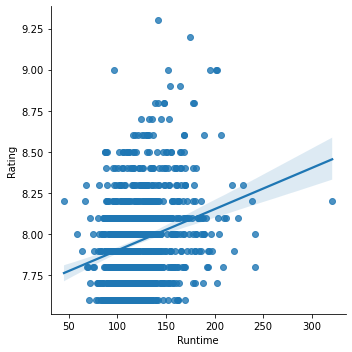

In [61]:
df_numeric['Runtime'].corr(df_numeric['Rating']), sns.lmplot(x = 'Runtime', y = 'Rating', data = df_numeric)

## 2. Christmas Movies in Top 1000

There is another dataset having all the movies with the tag 'Christmas Movie'. We are going to use it to see which Christmas movies are also in the top 1000.

In [62]:
# read the CSV of Christmas Movies
df_xmas = pd.read_csv('movie_data\christmas_movies.csv')
columns = df_xmas.columns
for column in columns:
    column_clean = column.strip().title()
    df_xmas.rename(columns = {column:column_clean}, inplace = True)
df_xmas.head()

,Title,Rating,Runtime,Imdb_Rating,Meta_Score,Genre,Release_Year,Description,Director,Stars,Votes,Gross,Img_Src,Type
0,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","491,920",$59.70M,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
1,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,49.0,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","198,428",$71.32M,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie
2,Spirited,PG-13,127.0,6.6,55.0,"Comedy, Family, Musical",2022.0,A musical version of Charles Dickens's story o...,Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...","34,304",NaN,https://m.media-amazon.com/images/M/MV5BY2RlZG...,Movie
3,Home Alone,PG,103.0,7.7,63.0,"Comedy, Family",1990.0,"An eight-year-old troublemaker, mistakenly lef...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...","584,210",$285.76M,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Movie
4,How the Grinch Stole Christmas,PG,104.0,6.3,46.0,"Comedy, Family, Fantasy",2000.0,"On the outskirts of Whoville lives a green, re...",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...","259,796",$260.04M,https://m.media-amazon.com/images/M/MV5BNWNiNT...,Movie


By using the Christmas movies dataset, we can tag movies in the top 1000 with the tags 'Xmas' and 'Non-Xmas'. As you can see, there are 17 Christmas movies in the top 1000.

In [63]:
xmas_list = []
# checking each movie title in the top 1000,
# if it is also in the Christmas dataset, tag it with 'Xmas'
# if not, tag it with 'Non-Xmas'
# and insert the result into our pre-created list
for movie in list(df_top1000['Movie Name']):
    if movie in list(df_xmas['Title']):
        xmas_list.append('Xmas')
    else:
        xmas_list.append('Non-Xmas')

# create a column of the tagging results in the original top 1000 table
df_top1000['Xmas Tag'] = xmas_list

df_top1000.groupby('Xmas Tag')['Movie Name'].count()

Xmas Tag
Non-Xmas    983
Xmas         17
Name: Movie Name, dtype: int64

But if there is a difference between Xmas and Non-Xmas movies in the top 1000? To answer it, we can perform ANOVA to check if there is a significant difference in the mean of every numeric factor ('Year', 'Runtime', 'Rating', and 'Gross After CPI') between the two categories.

In [64]:
# the package is for conducting one-way ANOVA
from scipy.stats import f_oneway

In [65]:
# indicate the columns we want to perform the ANOVA
check_list = ['Year', 'Runtime', 'Rating', 'Gross After CPI']

for item in check_list:
    # for each tag, extract the corresponding numbers and make a list of them
    # because there can be NaN in the cell, we have to eliminate it when computing
    # and the ANOVA compares the mean of the two list
    s, p = f_oneway(
        [x for x in list(df_top1000.loc[df_top1000['Xmas Tag'] == 'Xmas'][item]) if str(x) != 'nan'],
        [x for x in list(df_top1000.loc[df_top1000['Xmas Tag'] == 'Non-Xmas'][item]) if str(x) != 'nan']
    )
    print(f'{item}: {p}')

Year: 0.07630979811593462
Runtime: 0.012063969054607673
Rating: 0.8435585300652745
Gross After CPI: 0.8731223987998614


As you can see, 'Runtime' is the only factor with a significant difference (p < 0.05) between the Xmas and Non-Xmas movies in the top 1000. And looking at the detailed numbers and graph, we can find out that the average runtime of Christmas movies (106 mins) is significantly lower than the runtime of non-Christmas movies (124 mins), indicating that holiday movies may have deliberately shortened the runtime to attract families.

(Xmas Tag
 Non-Xmas    123.934893
 Xmas        106.411765
 Name: Runtime, dtype: float64,
 <AxesSubplot:xlabel='Runtime', ylabel='Xmas Tag'>)

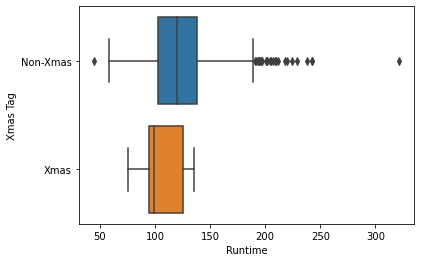

In [66]:
df_top1000.groupby('Xmas Tag')['Runtime'].mean(), sns.boxplot(x = 'Runtime', y = 'Xmas Tag', data = df_top1000)

## 3. Star Wars Episodes IV to VI

In this section, we will analyze the scripts of the Star Wars trilogy (the earliest ones, IV to VI).

### 3-1. Text Analysis

We have three text files which contain the dialogues of each episode. Because each filename has the same pattern, we can use glob to make a list of these files.

In [67]:
from glob import glob
files = sorted(glob('movie_data/SW_Episode*.txt'))
files

['movie_data\\SW_EpisodeIV.txt',
 'movie_data\\SW_EpisodeV.txt',
 'movie_data\\SW_EpisodeVI.txt']

Take a look at the first dialogue of the first episode, we can see that they are "number" and "character name in capital letters" at the beginning of each dialogue, which is not useful for text analysis, so we will use a regular expression to eliminate them.

In [68]:
with open(files[0], 'rt', encoding = 'UTF-8') as infile:
    for line in infile:
        print(line)
        break

"1" "THREEPIO" "Did you hear that?  They've shut down the main reactor.  We'll be destroyed for sure.  This is madness!"



In [69]:
import re
import string
import nltk
# you may need to download 'punkt' if there is an error shown when using the nltk tokenise function
# nltk.download('punkt')

In [70]:
# define a function to extract dialogue from each line,
# make the whole line of dialogue in lower letters and tokenise the dialogue
# there can be punctuations in the dialogue and should be eliminated
def dialogue(line):
    dialogues = re.findall(r'\"[0-9]{1,4}\"\s\"[A-Z]+.+\"\s\"(.+?)\"', line)
    return [token.lower() for token in nltk.word_tokenize(dialogues[0]) if token not in string.punctuation]

# perform the function on every file
# and make a list containing tokenised dialogues, separated by each episode
trilogy_dialogue = []
for file in files:
    each_episode = []
    with open(file, 'rt', encoding = 'UTF-8') as infile:
        for line in infile:
            each_episode.append(dialogue(line))
    trilogy_dialogue.append(each_episode)

trilogy_dialogue[0][0], len(trilogy_dialogue)

(['did',
  'you',
  'hear',
  'that',
  'they',
  "'ve",
  'shut',
  'down',
  'the',
  'main',
  'reactor',
  'we',
  "'ll",
  'be',
  'destroyed',
  'for',
  'sure',
  'this',
  'is',
  'madness'],
 3)

Now we have the prepared corpus, let's calculate numbers! We can see that the first episode has the most dialogue and words. And although the third episode has the least dialogues and words, there are fewer average words in dialogues in episode V.

In [71]:
# compute the number of dialogues in each episode
dialogue_count = [
    len(trilogy_dialogue[0]),
    len(trilogy_dialogue[1]),
    len(trilogy_dialogue[2])
]

# compute the number of words of total dialogues in each episode
word_count = []
for episode in trilogy_dialogue:
    count = 0
    for dialogue in episode:
        count += len(dialogue)
    word_count.append(count)

# compute the average word counts of each dialogue in each episode
word_per_dialogue = [
    round(word_count[0] / dialogue_count[0], 2),
    round(word_count[1] / dialogue_count[1], 2),
    round(word_count[2] / dialogue_count[2], 2)
]

# insert the computed numbers into an organised table
df_sw = pd.DataFrame(
    {
        'Word Count': word_count,
        'Dialogue Count': dialogue_count,
        'Word per Dialogue': word_per_dialogue
    }, index = ['IV', 'V', 'VI']
)

df_sw

,Word Count,Dialogue Count,Word per Dialogue
IV,12119,1010,12.00
V,8243,839,9.82
VI,7314,674,10.85


How about comparing the counts of words and dialogues with the runtime? We can see that the runtime of episode VI is the longest. However, it has fewer dialogues and words. Is it because maybe there are more fight scenes in the last episode? It can be interesting to investigate further.

In [72]:
# insert the runtime of each episode into the pre-created table
sw_runtime = [121, 124, 131]
df_sw['Runtime'] = sw_runtime

# compute the words per minute and insert them back into the table
word_per_min = [
    round(word_count[0] / sw_runtime[0], 2),
    round(word_count[1] / sw_runtime[1], 2),
    round(word_count[2] / sw_runtime[2], 2)
]
df_sw['Word per Min'] = word_per_min

# compute the dialogues per minute and insert them back into the table
dialogue_per_min = [
    round(dialogue_count[0] / sw_runtime[0], 2),
    round(dialogue_count[1] / sw_runtime[1], 2),
    round(dialogue_count[2] / sw_runtime[2], 2)
]
df_sw['Dialogue per Min'] = dialogue_per_min

df_sw.loc[:, ['Runtime', 'Word per Min', 'Dialogue per Min']]

,Runtime,Word per Min,Dialogue per Min
IV,121,100.16,8.35
V,124,66.48,6.77
VI,131,55.83,5.15


'The force' and 'Dark side' are important concepts of the trilogy. Where are the positions in the script when these terms are mentioned? To answer this, we can not simply use the corpus list we created before, because it is tokenised into single words and can not be searched for terms. We have to create another list containing bigrams for each dialogue.

In [73]:
from nltk.util import bigrams

In [74]:
# create a function similar to the previous one, but use the bigram function this time
def dialogue_bigram(line):
    dialogues = re.findall(r'\"[0-9]{1,4}\"\s\"[A-Z]+.+\"\s\"(.+?)\"', line)
    return list(bigrams([token.lower() for token in nltk.word_tokenize(dialogues[0]) if token not in string.punctuation]))

# create a bigram list which is also separated by episodes and dialogues
trilogy_dialogue_bigram = []
for file in files:
    each_episode = []
    with open(file, 'rt', encoding = 'UTF-8') as infile:
        for line in infile:
            each_episode.append(dialogue_bigram(line))
    trilogy_dialogue_bigram.append(each_episode)

Now we can find the position of the terms! From the graph, it is clear that the concept of the 'Dark side' is mainly discussed in the later half of the trilogy. And in episode V (around dialogue 1000 to 1500), both terms were not mentioned a lot, which may tell us that the theme of this episode can be slightly different from the others.

In [75]:
# define a function to create a list of positions
# that a certain tuple is in dialogues
def positions_of(words):
    position_number = []
    i = 0
    for episode in trilogy_dialogue_bigram:
        # count how many dialogues we have checked
        for dialogue in episode:
            i += 1
            # and insert the number to the list if the bigram is in the dialogue
            if words in dialogue:
                position_number.append(i)
    return position_number

# find the positions of the tuples ('the', 'force') and ('dark', 'side') in the dialogues
positions_of_force = positions_of(('the', 'force'))
position_of_dark = positions_of(('dark', 'side'))

In [76]:
import matplotlib.pyplot as plt

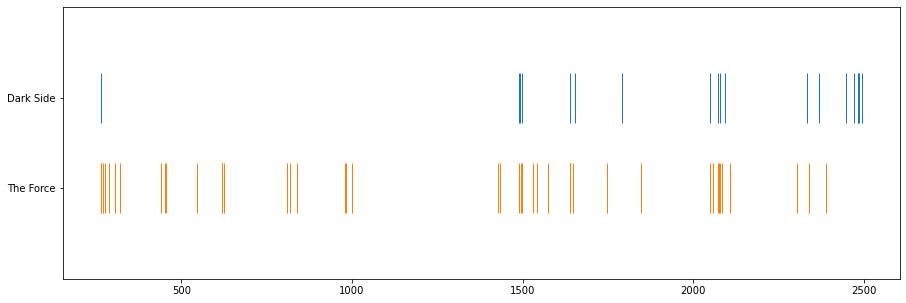

In [77]:
plt.figure(figsize=(15, 5))
names = ['The Force', 'Dark Side']
plt.plot(position_of_dark, [1] * len(position_of_dark), '|', markersize=50)
plt.plot(positions_of_force, [0] * len(positions_of_force), '|', markersize=50)
plt.yticks(range(len(names)), names)
plt.ylim(-1, 2);

### 3-2. Social Network Analysis

Who are the most important characters in the trilogy? We can perform a social network analysis to answer this. To do this, we will have to group the characters with each scene. However, since there is no information on the scene in our original text, we will have to extract information from the website that has the whole script.

In [78]:
from bs4 import BeautifulSoup
import requests

In [79]:
req_IV = requests.get('https://imsdb.com/scripts/Star-Wars-A-New-Hope.html')
soup_IV = BeautifulSoup(req_IV.content, 'html.parser')

In [80]:
print(soup_IV.find('pre').get_text()[:500])




                                        STAR WARS

                                        Episode IV

                                        A NEW HOPE

                                         From the
                                  JOURNAL OF THE WHILLS

                                            by
                                       George Lucas

                                   Revised Fourth Draft
                                     January 15, 1976

      


Now we have the script, we can extract the information we want. We will separate the script by each scene, extract characters in the scene with a list, and then combine the list into a big list.

In [81]:
# the script part in the website is covered by <pre></pre>
# so we find the text within the tag first
script_IV = str(soup_IV.find('pre').get_text())

# the title of a scene starts with something like EXT. or INT. (three letters in capital and a dot)
# so we use the pattern to split each scene
scene_list_IV = re.split(r'[A-Z]{3}\.', script_IV)

# create a list of characters separated by each scene
character_IV = []
for scene in scene_list_IV:
    # there are four white spaces before a character name and a '\r\n' after
    # character name has at least three letters in capital
    # there are some names like 'IMPERIAL OFFICER' which has a white space within
    # so we use or to fulfil this pattern too
    name = re.findall(r'\s\s\s\s([A-Z]{3,}|[A-Z]{3,}\s[A-Z]{3,})\r\n', scene)
    characters = []
    for character in name:
        if not character in characters:
            # some characters are 'something VOICE',
            # which is not face-to-face communication and should be eliminated
            # and the pattern we have for extracting character
            # sometimes wrongly get "DAY" from the scene title
            # which should be eliminated too
            if not 'VOICE' in character and character not in 'DAY':
                characters.append(character)
    # for network analysis, we need scenes with at least two characters
    # so if there is only one it should be eliminated
    if len(characters) > 1:
        character_IV.append(characters)

To conduct social network analysis, we will need an 'edge list', which contains pairs of characters that have been in one scene.

In [82]:
edges_IV = []
for item in character_IV:
    # this will come out all the possible pairs within a list
    pairs = [[a, b] for idx, a in enumerate(item) for b in item[idx + 1:]]
    for pair in pairs:
        # eliminate self-pairs because they can not be used for network analysis
        if not pair[0] == pair[1]:
            edges_IV.append(pair)
edges_IV[0:5]

[['IMPERIAL OFFICER', 'VADER'],
 ['IMPERIAL OFFICER', 'REBEL OFFICER'],
 ['VADER', 'REBEL OFFICER'],
 ['CHIEF PILOT', 'CAPTAIN'],
 ['FIXER', 'CAMIE']]

After preparing the edge list for episode IV, we can apply the same process to episodes V and IV to create their edge lists.

In [83]:
req_V = requests.get('https://imsdb.com/scripts/Star-Wars-The-Empire-Strikes-Back.html')
soup_V = BeautifulSoup(req_V.content, 'html.parser')

script_V = str(soup_V.find('pre').get_text())

scene_list_V = re.split(r'[A-Z]{3}\.', script_V)

character_V = []
for scene in scene_list_V:
    name = re.findall(r'\t([A-Z]{3,}|[A-Z]{3,}\s[A-Z]{3,})\r', scene)
    characters = []
    for character in name:
        if not character in characters:
            if not 'VOICE' in character:
                characters.append(character)
    if len(characters) > 1:
        character_V.append(characters)

edges_V = []
for item in character_V:
    pairs = [[a, b] for idx, a in enumerate(item) for b in item[idx + 1:]]
    for pair in pairs:
        if not pair[0] == pair[1]:
            edges_V.append(pair)
edges_V[0:5]

[['LUKE', 'HAN'],
 ['RIEEKAN', 'HAN'],
 ['RIEEKAN', 'LEIA'],
 ['HAN', 'LEIA'],
 ['LEIA', 'HAN']]

In [84]:
req_VI = requests.get('https://imsdb.com/scripts/Star-Wars-Return-of-the-Jedi.html')
soup_VI = BeautifulSoup(req_VI.content, 'html.parser')

script_VI = str(soup_VI.find('pre').get_text())

scene_list_VI = re.split(r'[0-9]\s\s', script_VI)

character_VI = []
for scene in scene_list_VI:
    name = re.findall(r'\r\n([A-Z]{3,}|[A-Z]{3,}\s[A-Z]{3,})\r\n', scene)
    characters = []
    for character in name:
        if not character in characters:
            if not 'VOICE' in character:
                characters.append(character)
    if len(characters) > 1:
        character_VI.append(characters)

edges_VI = []
for item in character_VI:
    pairs = [[a, b] for idx, a in enumerate(item) for b in item[idx + 1:]]
    for pair in pairs:
        if not pair[0] == pair[1]:
            edges_VI.append(pair)
edges_VI[0:5]

[['OFFICER', 'OPERATOR'],
 ['JERJERROD', 'VADER'],
 ['THREEPIO', 'BIB'],
 ['THREEPIO', 'JABBA'],
 ['THREEPIO', 'LUKE']]

The final step to perform social network analysis is to create a node list, which in this case is the distinct character list within our edge lists.

In [85]:
# define a function to create a list with distinct characters from an edge list
def nodes(edges):
    node_list = []
    for pair in edges:
        for character in pair:
            if not character in node_list:
                node_list.append(character)
    return node_list

# apply the function to the three edge lists
nodes_IV = nodes(edges_IV)
nodes_V = nodes(edges_V)
nodes_VI = nodes(edges_VI)

# combine the three node lists and eliminate the duplicates
nodes_all = []
for node in nodes_IV + nodes_V + nodes_VI:
    if not node in nodes_all:
        nodes_all.append(node)

Now we have the edge and node lists, we can use them with the package networkx to perform social network analysis! An important concept of social network analysis is 'degree centrality', which measures the count of neighbours a node has. We can first compute the degree centrality of each node (character).

In [86]:
import networkx as nx

In [87]:
G = nx.Graph()

# insert the edge list
G.add_edges_from(edges_IV + edges_V + edges_VI)

G.degree()

DegreeView({'IMPERIAL OFFICER': 9, 'VADER': 28, 'REBEL OFFICER': 2, 'CHIEF PILOT': 1, 'CAPTAIN': 2, 'FIXER': 4, 'CAMIE': 4, 'LUKE': 44, 'BIGGS': 11, 'DEAK': 4, 'LEIA': 32, 'COMMANDER': 9, 'SECOND OFFICER': 4, 'FIRST TROOPER': 8, 'SECOND TROOPER': 2, 'BERU': 3, 'OWEN': 4, 'THREEPIO': 41, 'AUNT BERU': 4, 'BEN': 12, 'TAGGE': 3, 'MOTTI': 4, 'TARKIN': 8, 'TROOPER': 9, 'BARTENDER': 5, 'CREATURE': 6, 'HUMAN': 5, 'HAN': 31, 'GREEDO': 1, 'SPEEDER LOT': 2, 'JABBA': 6, 'OFFICER CASS': 2, 'OFFICER': 8, 'GANTRY OFFICER': 4, 'AREA': 2, 'FIRST OFFICER': 3, 'WILLARD': 1, 'DODONNA': 3, 'GOLD LEADER': 5, 'WEDGE': 16, 'RED LEADER': 8, 'CHIEF': 5, 'RED SEVEN': 1, 'PORKINS': 1, 'RED NINE': 1, 'RED ELEVEN': 1, 'RED TEN': 2, 'TECHNICIAN': 4, 'RIEEKAN': 5, 'DECK OFFICER': 3, 'ASSISTANT OFFICER': 2, 'LIEUTENANT': 2, 'DERLIN': 5, 'ZEV': 2, 'ANNOUNCER': 6, 'SENIOR CONTROLLER': 4, 'PIETT': 9, 'OZZEL': 3, 'REBEL CAPTAIN': 1, 'REBEL FIGHTER': 1, 'MEDICAL DROID': 1, 'CONTROLLER': 9, 'VEERS': 4, 'HOBBIE': 3, 'PILOTS'

After sorting the degree centrality and plotting the network, it is without a doubt that Luke, Leia and Han are in the centre among the characters. However, surprisingly, Threepio's degree centrality is even higher than Leia and Han, meaning that it (or he?) should also be considered one of the main characters in the trilogy.

In [88]:
# show nodes with top 10 degree centrality
sorted(G.degree(), key = lambda x: x[1], reverse = True)[0:9]

[('LUKE', 44),
 ('THREEPIO', 41),
 ('LEIA', 32),
 ('HAN', 31),
 ('VADER', 28),
 ('LANDO', 19),
 ('WEDGE', 16),
 ('BEN', 12),
 ('BIGGS', 11)]

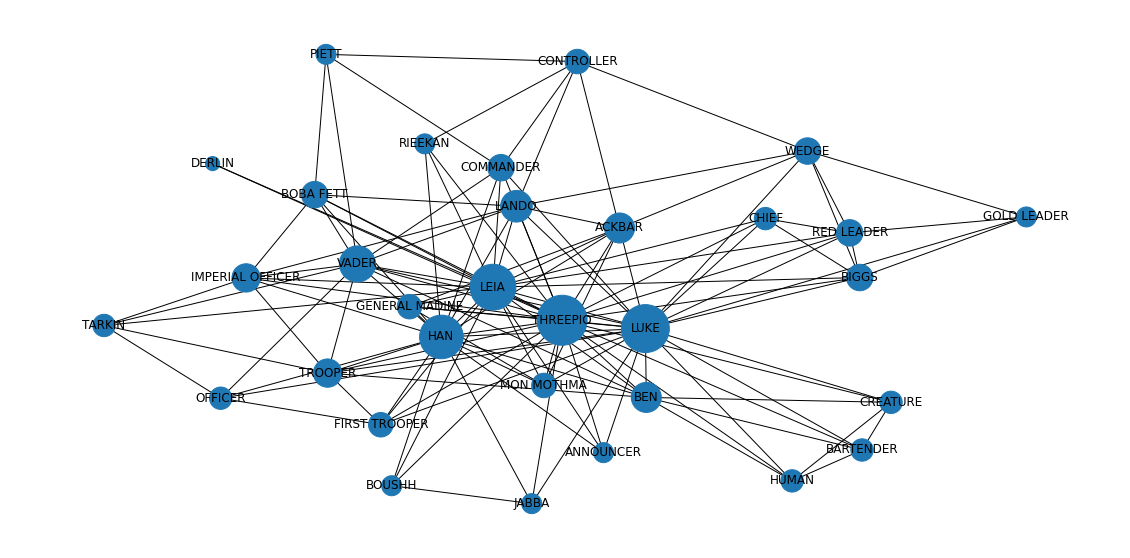

In [89]:
# create another graph here because we will filter it later
# and we do not want to mess it with the original one
G_plot = nx.Graph()
G_plot.add_edges_from(edges_IV + edges_V + edges_VI)

# make a list of nodes that have degree centrality > 5
# so we can use this as node list after
keep = [node for node in nodes_all if G_plot.degree[node] >= 5]

# filter out the nodes with a degree centrality < 5
G_plot.remove_nodes_from([node for node in nodes_all if G_plot.degree[node] < 5])

# determine the size of each node by its degree centrality
node_sizes = [G_plot.degree[node] * 100 for node in keep]

# plot the network
fig, ax = plt.subplots(figsize = (20,10))
nx.draw(G_plot, ax = ax, with_labels = True, nodelist = keep, node_size = node_sizes)